In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
X_train = joblib.load("X_train_resampled.pkl")
y_train = joblib.load("y_train_resampled.pkl")
X_test = joblib.load("X_test_resampled.pkl")
y_test = joblib.load("y_test_resampled.pkl")

In [3]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [4]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (116328, 14)
y_train shape: (116328,)
X_test shape: (29082, 14)
y_test shape: (29082,)


In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
w = np.zeros(X_train.shape[1])
b = 0

In [7]:
def predict(X, w, b):
    return sigmoid(np.dot(X, w) + b)

In [8]:
def compute_cost_logistic_reg(X, y, w, b, lambda_ = 1):
    m,n  = X.shape
    cost = 0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        #Done to avoid log(0) as it kept showing me that error.
        epsilon = 1e-15 
        f_wb_i = np.clip(f_wb_i, epsilon, 1 - epsilon)
        cost += -y[i]*np.log(f_wb_i) - (1 - y[i])*np.log(1 - f_wb_i)
        cost += -y[i]*np.log(f_wb_i) - (1 - y[i])*np.log(1 - f_wb_i)
    
    cost = cost/m
    cost += (lambda_/(2*m)) * np.sum(np.square(w))
    return cost

In [9]:
# def compute_gradient_logistic_reg(X, y, w, b, lambda_): 

#     m,n = X.shape
#     dj_dw = np.zeros((n,))                            
#     dj_db = 0.0                                       

#     for i in range(m):
#         f_wb_i = sigmoid(np.dot(X[i],w) + b)          
#         err_i  = f_wb_i  - y[i]                       
#         for j in range(n):
#             dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
#         dj_db = dj_db + err_i
#     dj_dw = dj_dw/m                                   
#     dj_db = dj_db/m                                   

#     for j in range(n):
#         dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

#     return dj_db, dj_dw  


In [10]:
def compute_gradient_logistic_reg(X, y, w, b, lambda_):
    m, n = X.shape

    z = np.dot(X, w) + b         
    f_wb = sigmoid(z)            
 
    error = f_wb - y             

    dj_dw = (np.dot(X.T, error) / m) + (lambda_ / m) * w  
    dj_db = np.sum(error) / m                          

    return dj_db, dj_dw

In [11]:
def gradient_descent_logistic_reg(X, y, w_in, b_in, alpha, num_iters, lambda_, compute_cost, compute_gradient): 

    w = w_in.copy()
    b = b_in
    J_history = []

    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(X, y, w, b, lambda_)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i % 100 == 0 or i == num_iters - 1:
            cost = compute_cost(X, y, w, b, lambda_)
            J_history.append(cost)
            print(f"Iteration {i:4d}: Cost {cost:.6f}")

    return w, b, J_history

In [12]:
w_i = np.zeros(X_train.shape[1])
b_i = 0


In [13]:
alpha = 0.1
lambda_ = 100
num_iters = 10000


w_trained, b_trained, cost_history = gradient_descent_logistic_reg(
    X_train, y_train, w_i, b_i,
    alpha, num_iters, lambda_,
    compute_cost_logistic_reg,
    compute_gradient_logistic_reg
)

Iteration    0: Cost 1.316497
Iteration  100: Cost 0.734128
Iteration  200: Cost 0.708881
Iteration  300: Cost 0.700577
Iteration  400: Cost 0.696591
Iteration  500: Cost 0.694337
Iteration  600: Cost 0.692926
Iteration  700: Cost 0.691971
Iteration  800: Cost 0.691281
Iteration  900: Cost 0.690756
Iteration 1000: Cost 0.690339
Iteration 1100: Cost 0.689995
Iteration 1200: Cost 0.689705
Iteration 1300: Cost 0.689454
Iteration 1400: Cost 0.689234
Iteration 1500: Cost 0.689038
Iteration 1600: Cost 0.688861
Iteration 1700: Cost 0.688700
Iteration 1800: Cost 0.688553
Iteration 1900: Cost 0.688416
Iteration 2000: Cost 0.688290
Iteration 2100: Cost 0.688171
Iteration 2200: Cost 0.688060
Iteration 2300: Cost 0.687955
Iteration 2400: Cost 0.687855
Iteration 2500: Cost 0.687760
Iteration 2600: Cost 0.687670
Iteration 2700: Cost 0.687583
Iteration 2800: Cost 0.687501
Iteration 2900: Cost 0.687421
Iteration 3000: Cost 0.687344
Iteration 3100: Cost 0.687270
Iteration 3200: Cost 0.687199
Iteration 

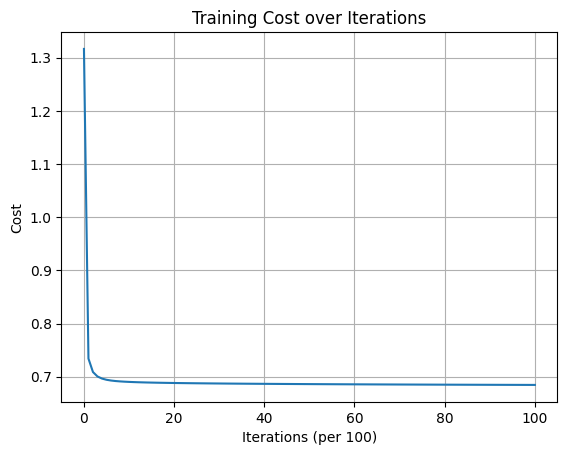

In [14]:
plt.plot(cost_history)
plt.xlabel("Iterations (per 100)")
plt.ylabel("Cost")
plt.title("Training Cost over Iterations")
plt.grid(True)
plt.show()

In [15]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    preds = sigmoid(z)
    return preds >= 0.5

In [16]:
y_pred_test = predict(X_test, w_trained, b_trained).astype(int)
y_pred_train = predict(X_train, w_trained, b_trained).astype(int)

In [17]:
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred) * 100

accuracy_test = compute_accuracy(y_test, y_pred_test)
print(f"Accuracy on test set: {accuracy_test:.2f}%")

accuracy_train = compute_accuracy(y_train, y_pred_train)
print(f"Accuracy on training set: {accuracy_train:.2f}%")

Accuracy on test set: 83.55%
Accuracy on training set: 84.20%


In [18]:
# 0.1, 10, 10000
# Accuracy on test set: 86.06%
# Accuracy on training set: 84.28%

In [19]:
def confusion_matrix_manual(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    
    return np.array([[TN, FP],
                     [FN, TP]])

In [20]:
cm_test = confusion_matrix_manual(y_test, y_pred_test)
cm_train = confusion_matrix_manual(y_train, y_pred_train)

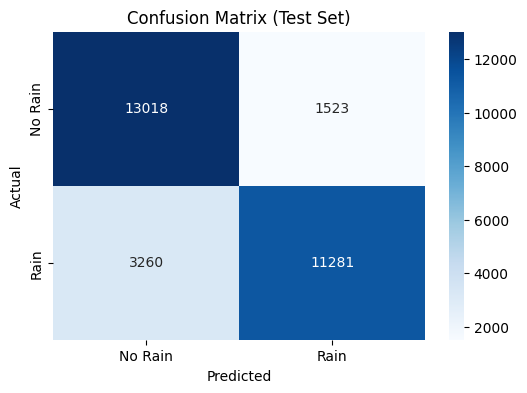

In [21]:
labels = ['No Rain', 'Rain']
plt.figure(figsize=(6,4))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()

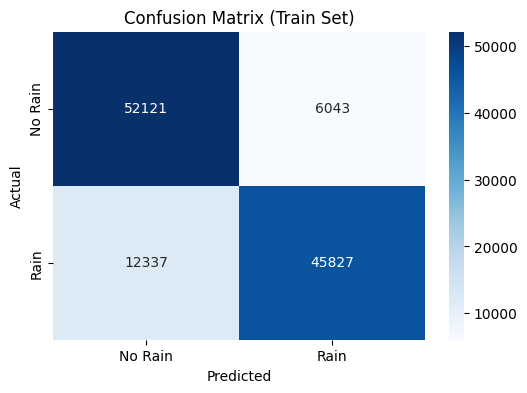

In [22]:
labels = ['No Rain', 'Rain']
plt.figure(figsize=(6,4))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Train Set)")
plt.show()

In [23]:
TN, FP, FN, TP = cm_test.ravel()

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score  = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Test Set:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")

Test Set:
Precision: 0.8811
Recall:    0.7758
F1 Score:  0.8251


In [24]:
TN, FP, FN, TP = cm_train.ravel()
precision = TP / (TP + FP) if (TP + FP) > 0 else 0 
recall    = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score  = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Train Set:")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")

Train Set:
Precision: 0.8835
Recall:    0.7879
F1 Score:  0.8330
